In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import utils

In [3]:
# read the cleaned data
df_raw = pd.read_csv('Data/cleaned_data.csv')

In [4]:
df = df_raw.copy()  

In [5]:
display(df.head(3), df.shape)   

,Patient ID,Histologic Type ICD-O-3,Year of diagnosis,Sex,Race,Radiation recode,Age,Marital Status,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size,Survival Months
0,62012497,8045,2004,Male,White,0,65-69 years,Married,0,0,T2,N2,M1,IV,40,1
1,62010191,8045,2004,Female,White,1,35-49 years,Married,1,1,T2,N2,M0,III,40,97
2,62055106,8045,2004,Female,White,1,35-49 years,Single,1,1,T1,N2,M0,III,30,14


(947, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient ID               947 non-null    int64 
 1   Histologic Type ICD-O-3  947 non-null    int64 
 2   Year of diagnosis        947 non-null    int64 
 3   Sex                      947 non-null    object
 4   Race                     947 non-null    object
 5   Radiation recode         947 non-null    int64 
 6   Age                      947 non-null    object
 7   Marital Status           947 non-null    object
 8   Chemotherapy             947 non-null    int64 
 9   Surgery                  947 non-null    int64 
 10  T                        947 non-null    object
 11  N                        947 non-null    object
 12  M                        947 non-null    object
 13  Grouped Stage            947 non-null    object
 14  Tumor Size               947 non-null    i

In [7]:
# value counts for diffrerent Year of diagnosis
df['Year of diagnosis'].value_counts(dropna=False).sort_index()

Year of diagnosis
2004    56
2005    52
2006    54
2007    74
2008    56
2009    57
2010    62
2011    61
2012    56
2013    64
2014    67
2015    58
2016    53
2017    46
2018    59
2019    41
2020    31
Name: count, dtype: int64

Counts and percentages of unique values in Year of diagnosis:
                   Count  Percentage
Year of diagnosis                   
2007                  74    7.814150
2014                  67    7.074974
2013                  64    6.758184
2010                  62    6.546990
2011                  61    6.441394
2018                  59    6.230201
2015                  58    6.124604
2009                  57    6.019007
2004                  56    5.913411
2012                  56    5.913411
2008                  56    5.913411
2006                  54    5.702218
2016                  53    5.596621
2005                  52    5.491024
2017                  46    4.857445
2019                  41    4.329461
2020                  31    3.273495


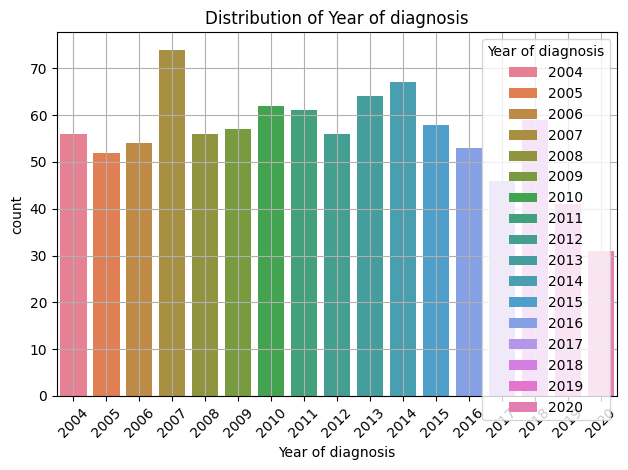

In [8]:
from utils.exploration import *
# change the data type of 'Year of diagnosis' to category
df['Year of diagnosis'] = df['Year of diagnosis'].astype('category')

# data exploration
data_exploration(df, 'Year of diagnosis')

Counts and percentages of unique values in Sex:
        Count  Percentage
Sex                      
Male      530   55.966209
Female    417   44.033791


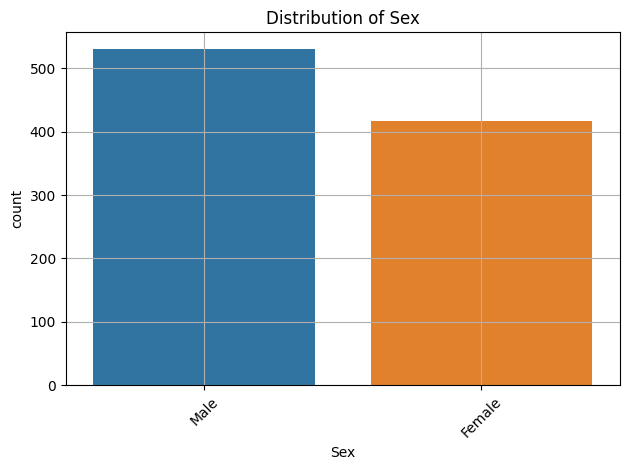

In [9]:
data_exploration(df, 'Sex')

Counts and percentages of unique values in Race:
                               Count  Percentage
Race                                            
White                            809   85.427666
Black                             96   10.137276
Asian or Pacific Islander         33    3.484688
American Indian/Alaska Native      9    0.950370


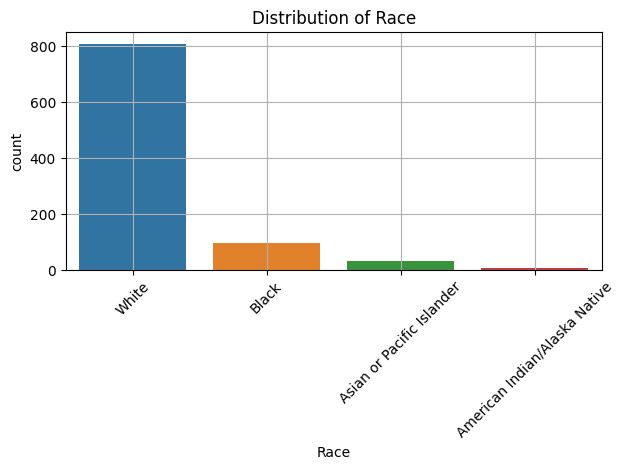

In [10]:
data_exploration(df, 'Race')

Counts and percentages of unique values in Radiation recode:
                  Count  Percentage
Radiation recode                   
0                   521   55.015839
1                   426   44.984161


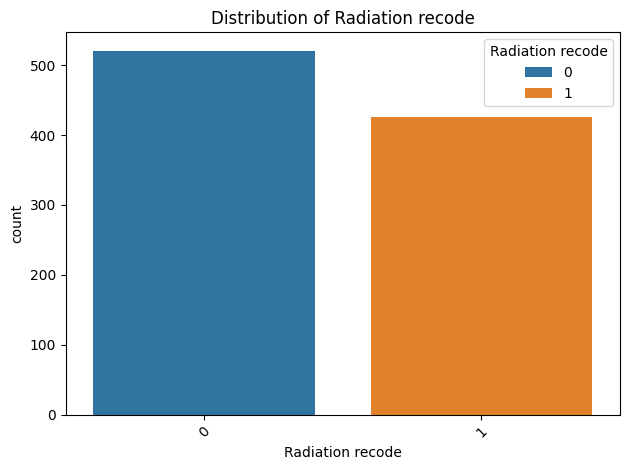

In [11]:
# Radiation recode
data_exploration(df, 'Radiation recode')

Counts and percentages of unique values in Age:
             Count  Percentage
Age                           
70-74 years    189   19.957761
65-69 years    181   19.112988
75-79 years    143   15.100317
60-64 years    130   13.727561
80-84 years     95   10.031679
55-59 years     91    9.609293
50-54 years     50    5.279831
85+ years       37    3.907075
35-49 years     31    3.273495


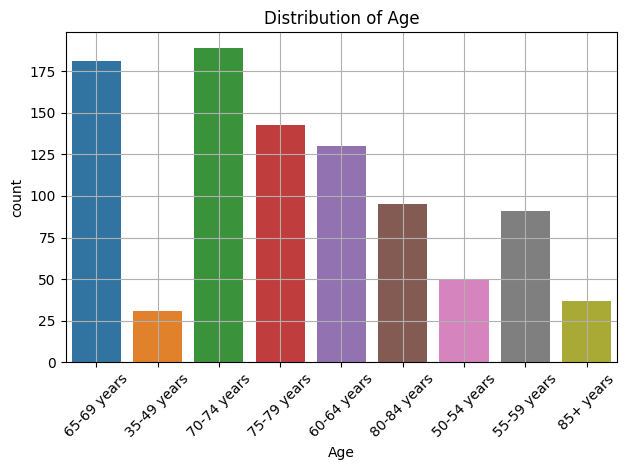

In [12]:
# Age
data_exploration(df, 'Age')

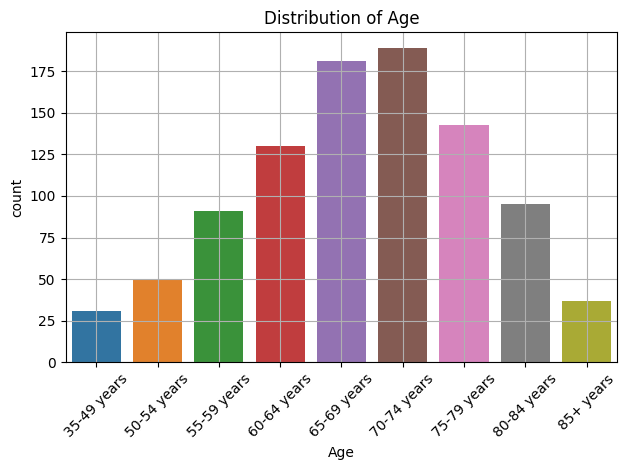

In [13]:
# Define the logical order for the 'Age' categories
age_order = ['35-49 years', '50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', '75-79 years', '80-84 years', '85+ years']

# Convert 'Age' to a categorical type with the specified order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Now create the countplot with the ordered 'Age' column
sns.countplot(data=df, x='Age', hue='Age', order=age_order)
plt.title("Distribution of Age")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Counts and percentages of unique values in Marital Status:
                        Count  Percentage
Marital Status                           
Married                   523   55.227033
Single                    273   28.827878
Single (never married)    115   12.143611
Unknown/Other              36    3.801478


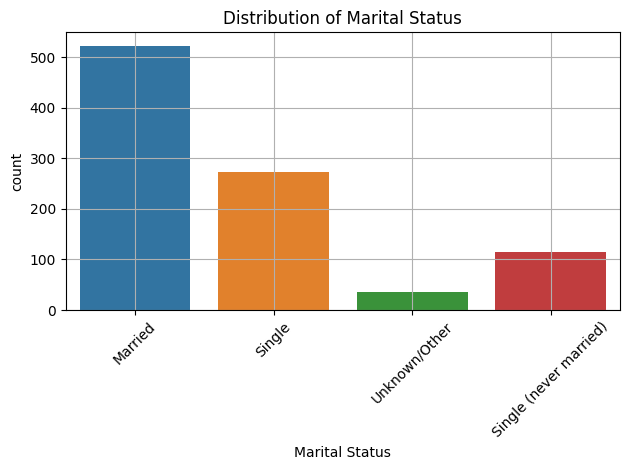

In [14]:
# Marital Status
data_exploration(df, 'Marital Status')

Counts and percentages of unique values in Chemotherapy:
              Count  Percentage
Chemotherapy                   
1               631   66.631468
0               316   33.368532


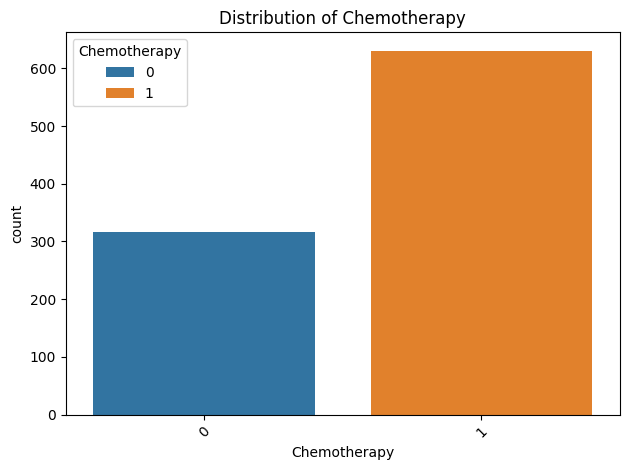

In [15]:
# Chemotherapy
data_exploration(df, 'Chemotherapy')

Counts and percentages of unique values in Surgery:
         Count  Percentage
Surgery                   
0          603   63.674762
1          344   36.325238


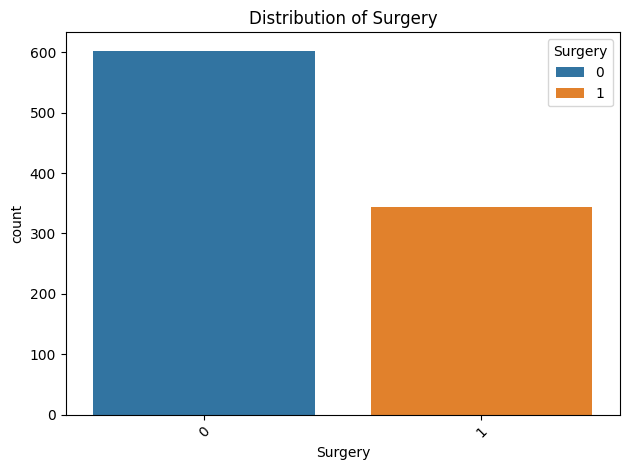

In [16]:
# Surgery
data_exploration(df, 'Surgery')

Counts and percentages of unique values in T:
    Count  Percentage
T                    
T2    320   33.790919
T4    282   29.778247
T1    199   21.013728
T3    146   15.417107


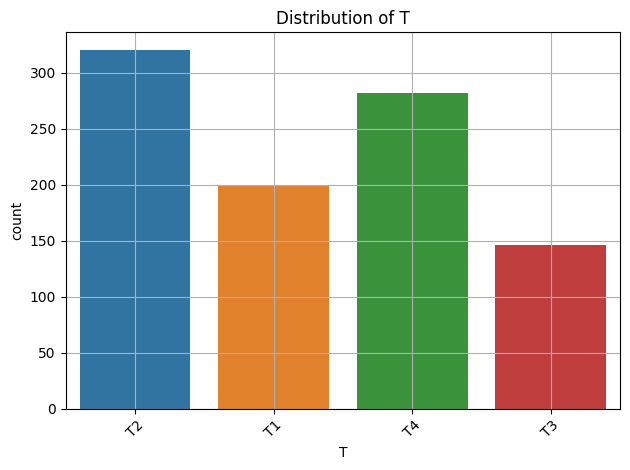

In [17]:
# T
data_exploration(df, 'T')

Counts and percentages of unique values in N:
    Count  Percentage
N                    
N2    418   44.139388
N0    288   30.411827
N3    145   15.311510
N1     96   10.137276


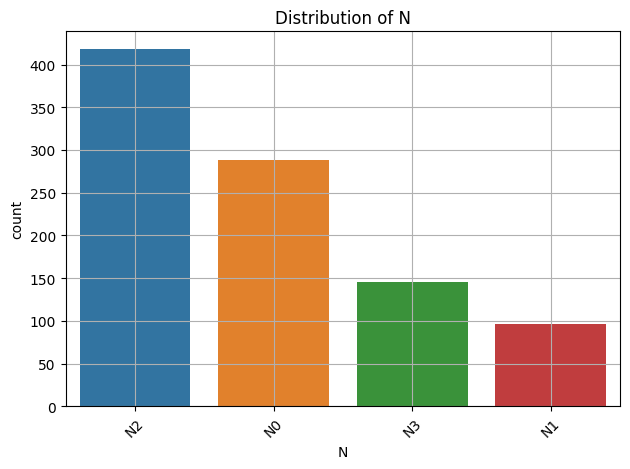

In [18]:
# N
data_exploration(df, 'N')


Counts and percentages of unique values in M:
    Count  Percentage
M                    
M1    478   50.475185
M0    469   49.524815


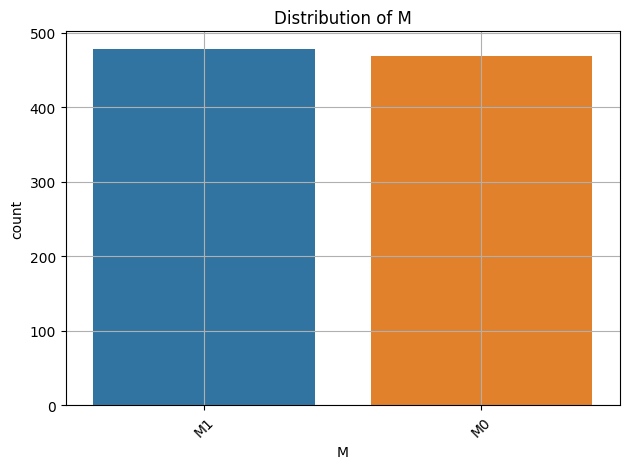

In [19]:
# M
data_exploration(df, 'M')

Counts and percentages of unique values in Grouped Stage:
               Count  Percentage
Grouped Stage                   
IV               478   50.475185
III              258   27.243928
I                138   14.572334
II                73    7.708553


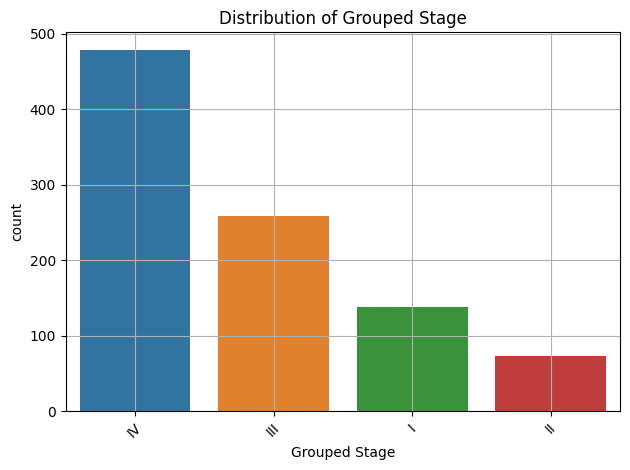

In [20]:
# Grouped Stage
data_exploration(df, 'Grouped Stage')

Mean of Tumor Size: 46.90
Median of Tumor Size: 40.00
Standard deviation of Tumor Size: 29.43
Mode of Tumor Size: 30
Number of outliers in Tumor Size: 32
Number of extreme outliers in Tumor Size: 0


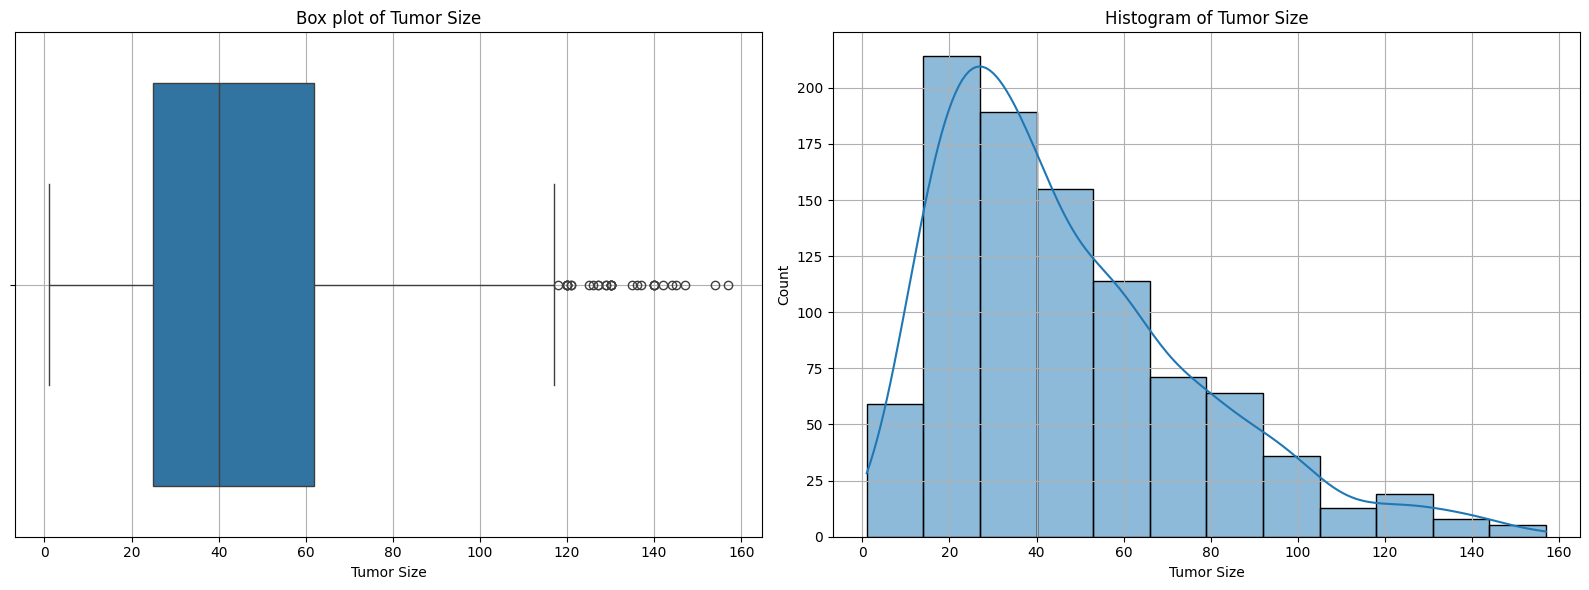

In [21]:
# Tumor Size
data_exploration(df, 'Tumor Size')